In [6]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

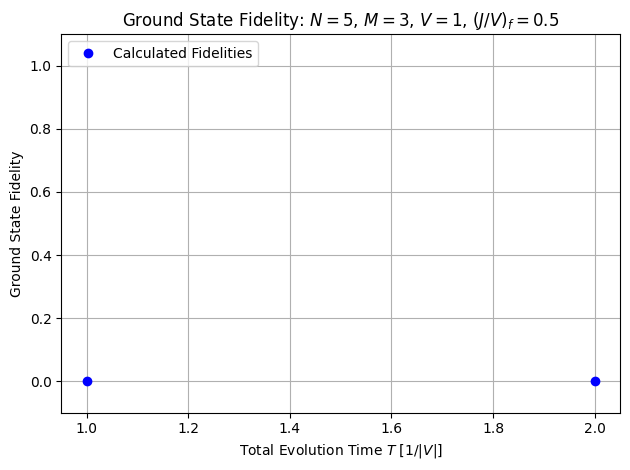

In [7]:
script_dir = os.getcwd()
data_folder_path = os.path.join(script_dir, "optimization_results")

N = 5
M = 3
V = 1
J_V_final = 0.5

Ts = [1,2,3,4,5,6,7,8,9,10]
ground_state_fidelities = []

for T in Ts:  
    csv_filename = f"N={N}_M={M}_V={V}_JVfinal={J_V_final}_T={T}.csv"
    csv_path = os.path.join(data_folder_path, csv_filename)

    if not os.path.exists(csv_path):
        print(f"Warning: {csv_path} not found, skipping...")
        continue

    df = pd.read_csv(csv_path)
    J_V_path = np.array(df["J_V_path"])
    mu_V_path = np.array(df["mu_V_path"])
    times_dense = np.array(df["times_dense"])

    hamiltonians = []
    for i, t in enumerate(times_dense):
        ham = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i], J_V_ratio=J_V_path[i])
        hamiltonians.append(ham)

    results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)
    ground_state_fidelities += [results[2][-1][0]]
    
"""if len(ground_state_fidelities) > 1:
        slope, intercept = np.polyfit(Ts[:len(ground_state_fidelities)], ground_state_fidelities, deg=1)
        fit_Ts = np.linspace(0, 10, 100)
        fit_fidelities = np.polyval([slope, intercept], fit_Ts)"""

fig, ax = plt.subplots()
ax.plot(Ts[:len(ground_state_fidelities)], ground_state_fidelities, 'ob', label = "Calculated Fidelities")
#ax.plot(fit_Ts, fit_fidelities, "--r", label = f"Linear Fit\n$F$ = {np.round(slope,3)}$T$ + {np.round(intercept,3)}")
ax.set_ylim(-0.1, 1.1)
ax.set_title(f"Ground State Fidelity: $N={N}$, $M={M}$, $V={V}$, $(J/V)_f = {J_V_final}$")
ax.set_xlabel("Total Evolution Time $T$ [$1/|V|$]")
ax.set_ylabel("Ground State Fidelity")
ax.legend(loc="upper left")
ax.grid()
fig.tight_layout()

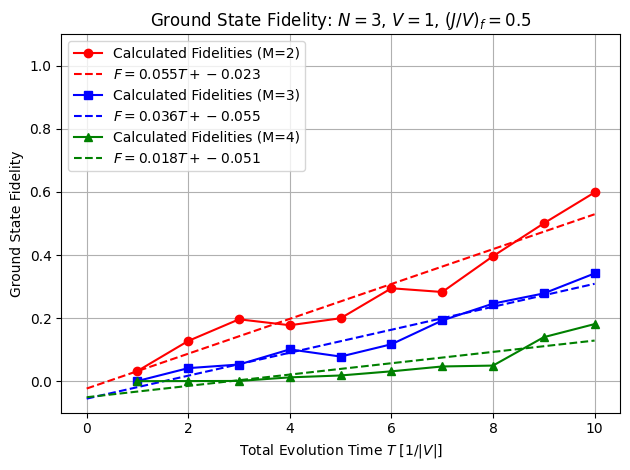

In [ ]:
# N = 3, M varying plot

fig, ax = plt.subplots()

colors = {2: "red", 3: "blue", 4: "green"}
markers = {2: "o", 3: "s", 4: "^"}

N = 3
V = 1
J_V_final = 0.5

for M in [2, 3, 4]:
    color = colors[M]
    marker = markers[M]

    Ts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    ground_state_fidelities = []

    for T in Ts:  
        csv_filename = f"N={N}_M={M}_V={V}_JVfinal={J_V_final}_T={T}.csv"
        csv_path = os.path.join(data_folder_path, csv_filename)

        if not os.path.exists(csv_path):
            print(f"Warning: {csv_path} not found, skipping...")
            continue

        df = pd.read_csv(csv_path)
        J_V_path = np.array(df["J_V_path"])
        mu_V_path = np.array(df["mu_V_path"])
        times_dense = np.array(df["times_dense"])

        hamiltonians = [
            construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i], J_V_ratio=J_V_path[i])
            for i in range(len(times_dense))
        ]

        results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)
        ground_state_fidelities.append(results[2][-1][0])
    
    if len(ground_state_fidelities) > 1:
        slope, intercept = np.polyfit(Ts[:len(ground_state_fidelities)], ground_state_fidelities, deg=1)
        fit_Ts = np.linspace(0, 10, 100)
        fit_fidelities = np.polyval([slope, intercept], fit_Ts)

        ax.plot(Ts[:len(ground_state_fidelities)], ground_state_fidelities, marker = marker, color=color, label=f"Calculated Fidelities (M={M})")
        ax.plot(fit_Ts, fit_fidelities, "--", color=color, label=f"$F = {slope:.3f}T + {intercept:.3f}$")

ax.set_ylim(-0.1, 1.1)
ax.set_title(f"Ground State Fidelity: $N={N}$, $V={V}$, $(J/V)_f = {J_V_final}$")
ax.set_xlabel("Total Evolution Time $T$ [$1/|V|$]")
ax.set_ylabel("Ground State Fidelity")
ax.legend(loc="upper left")
ax.grid()
fig.tight_layout()

plt.show()

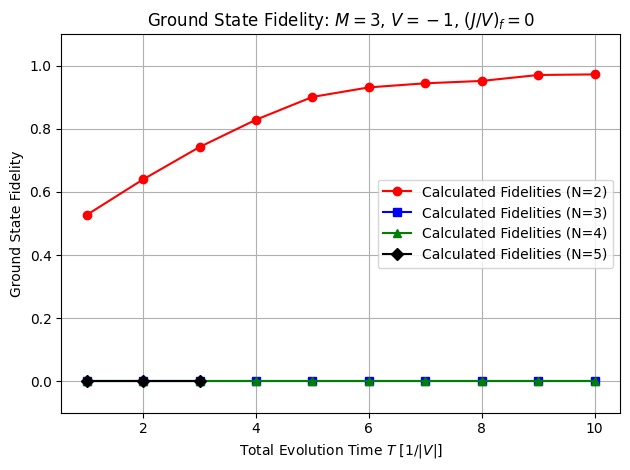

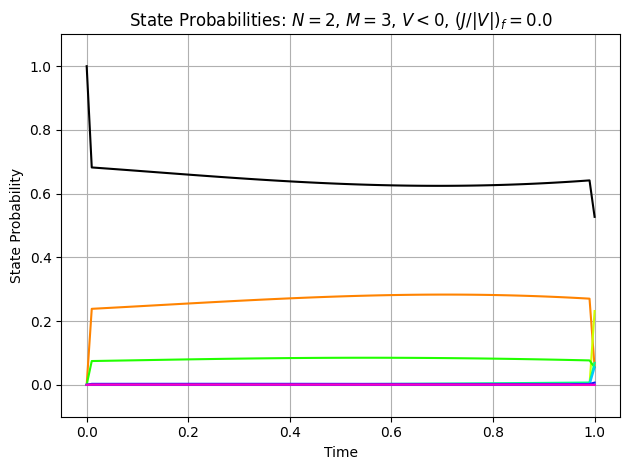

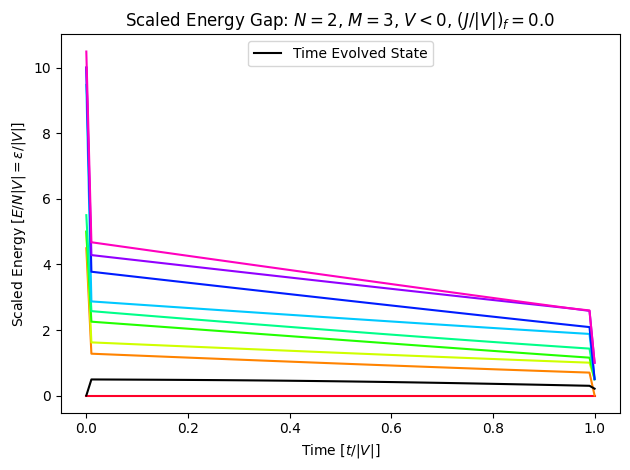

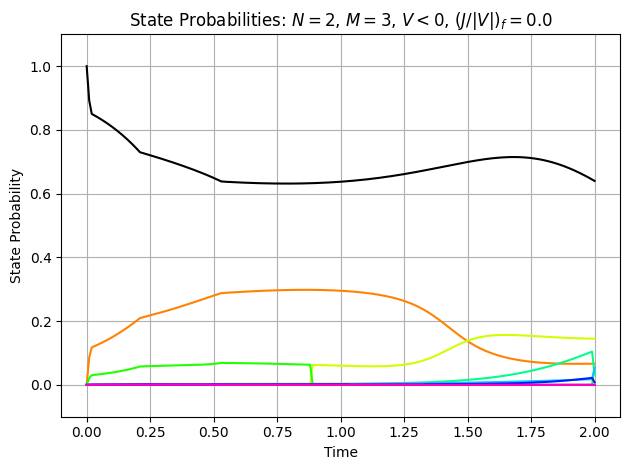

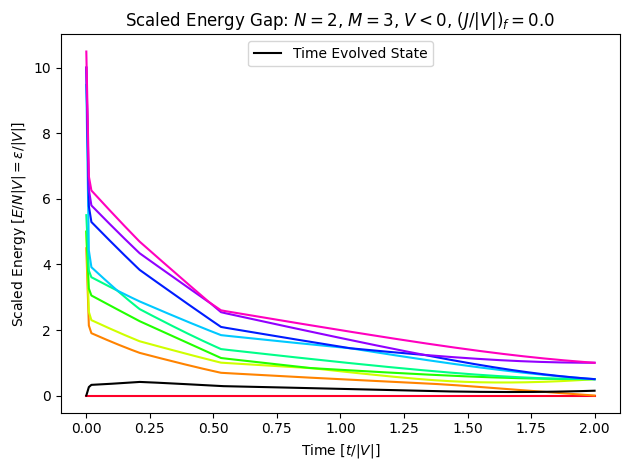

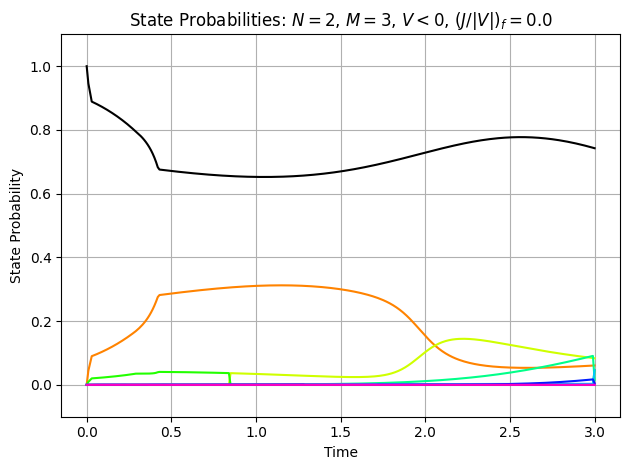

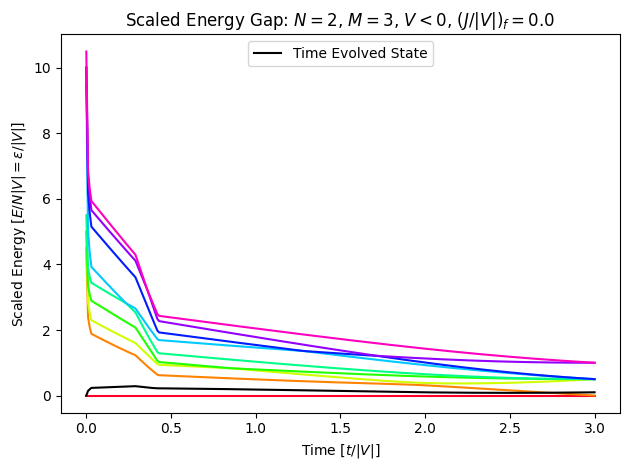

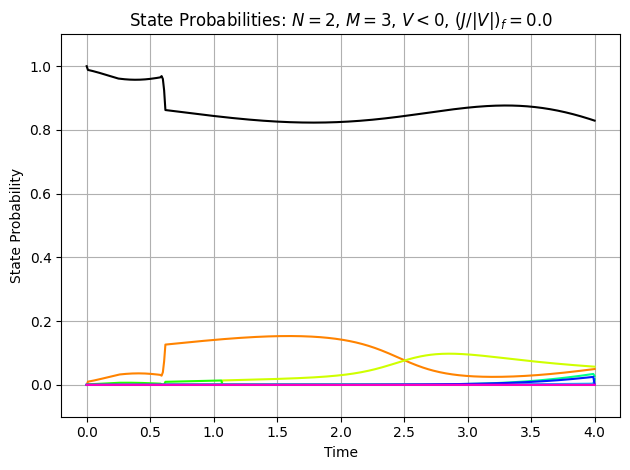

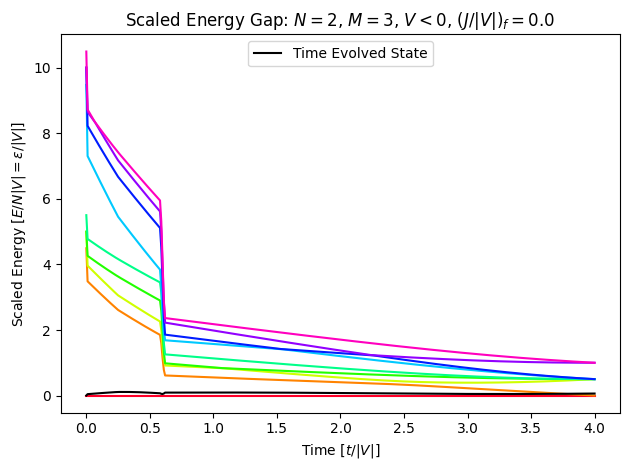

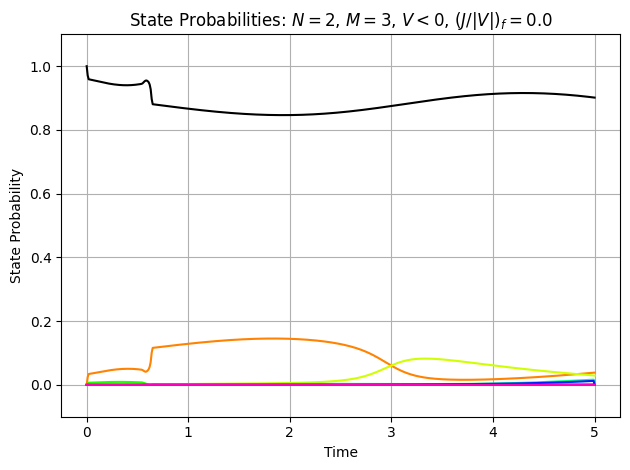

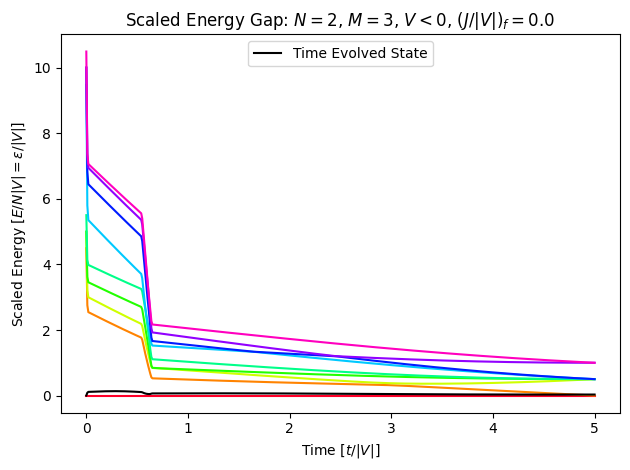

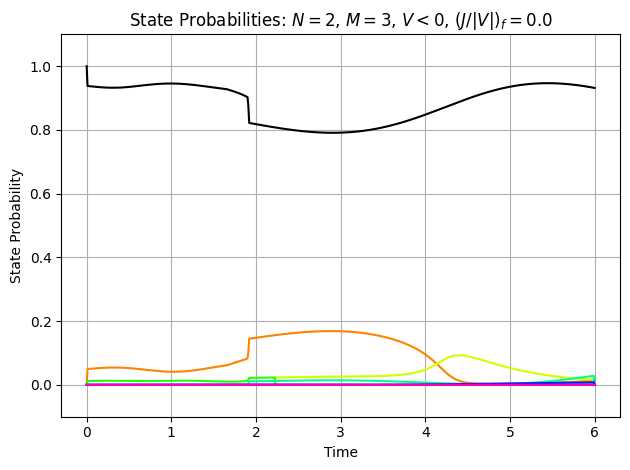

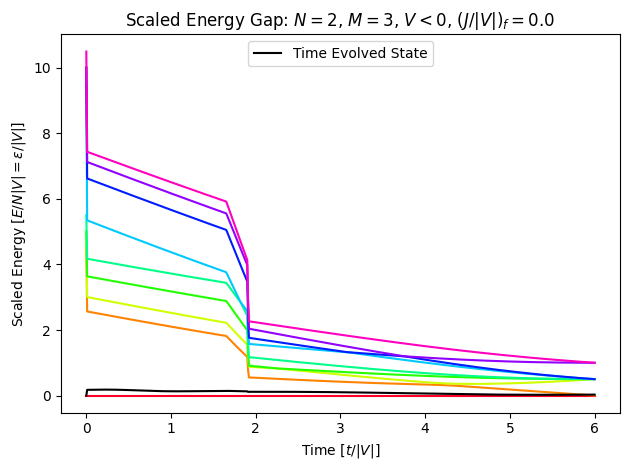

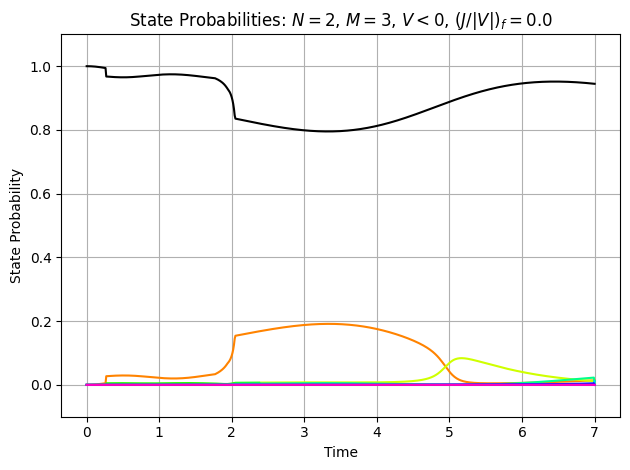

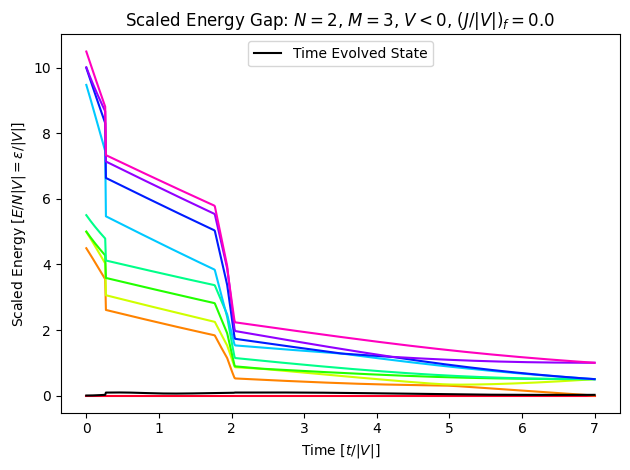

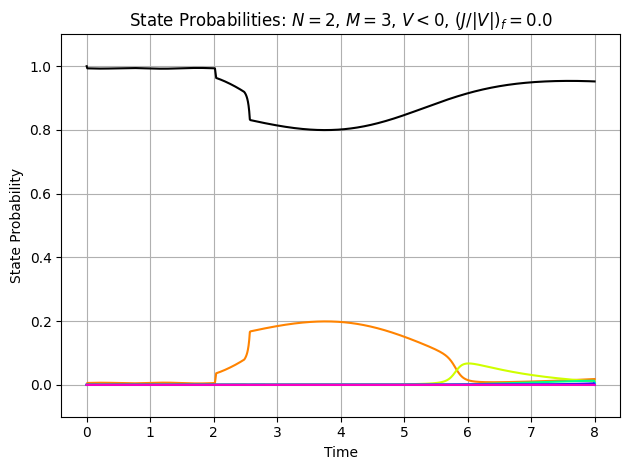

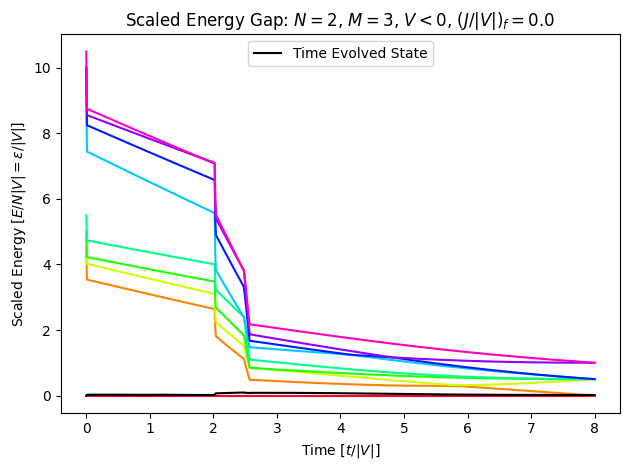

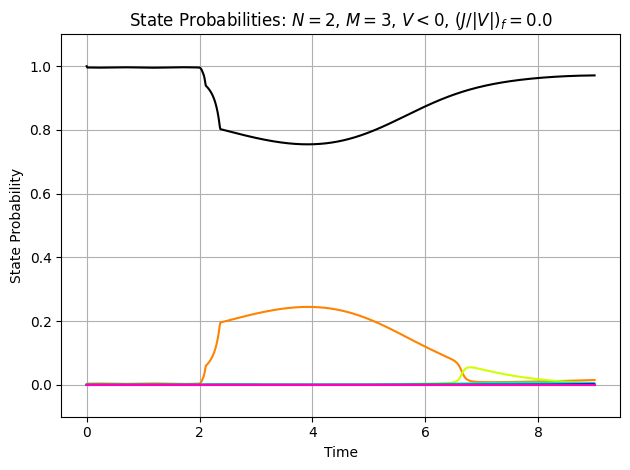

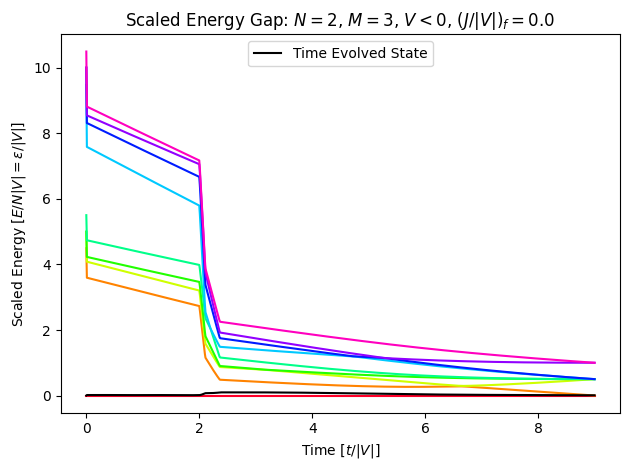

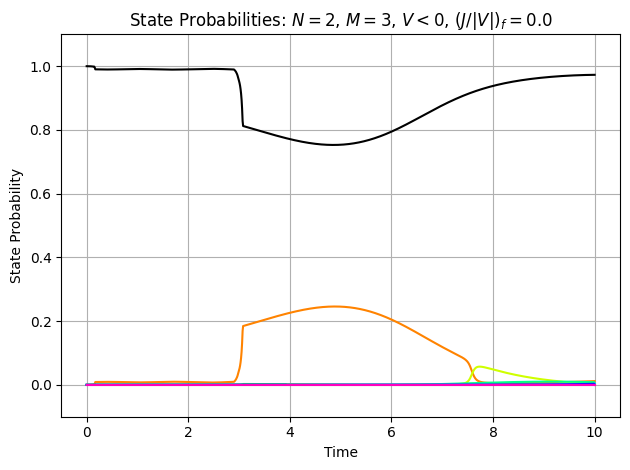

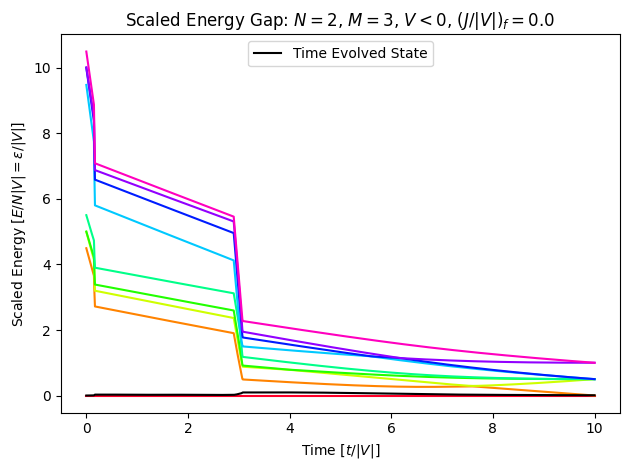

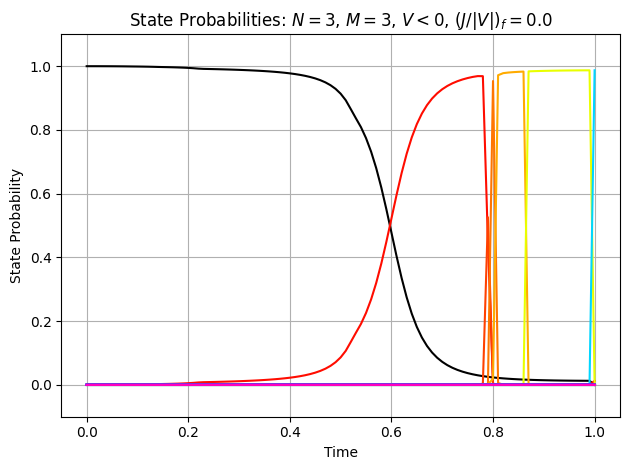

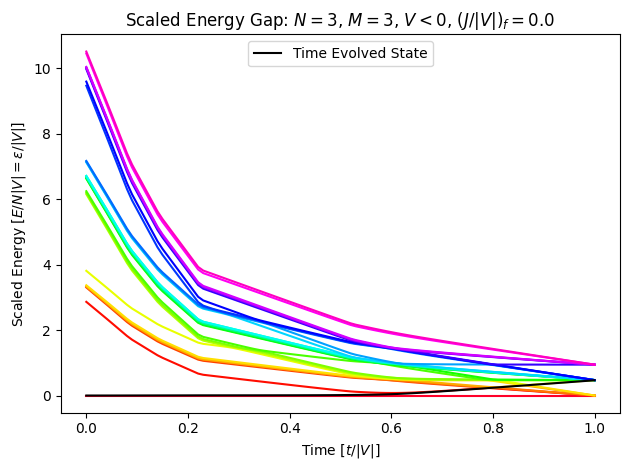

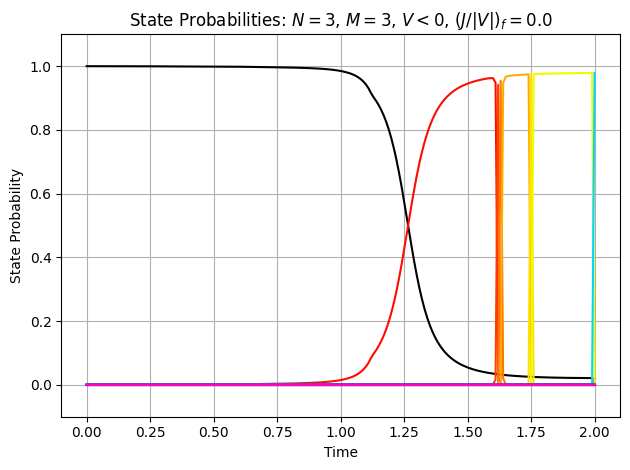

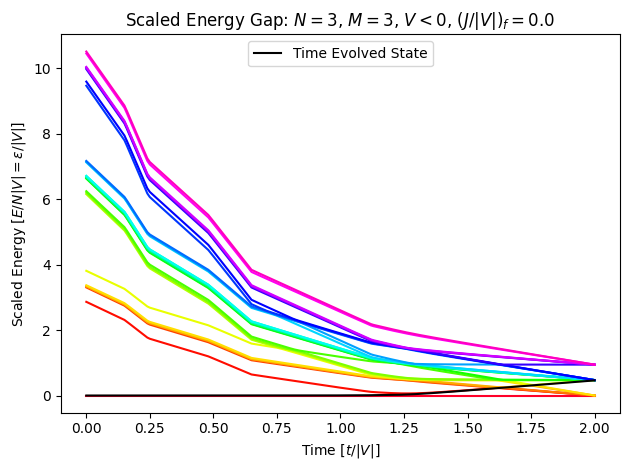

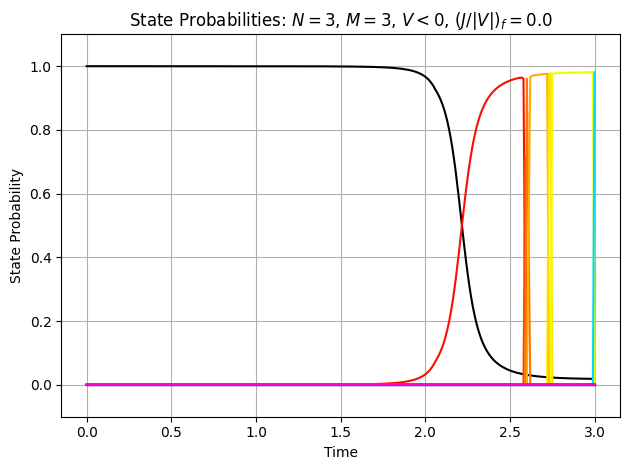

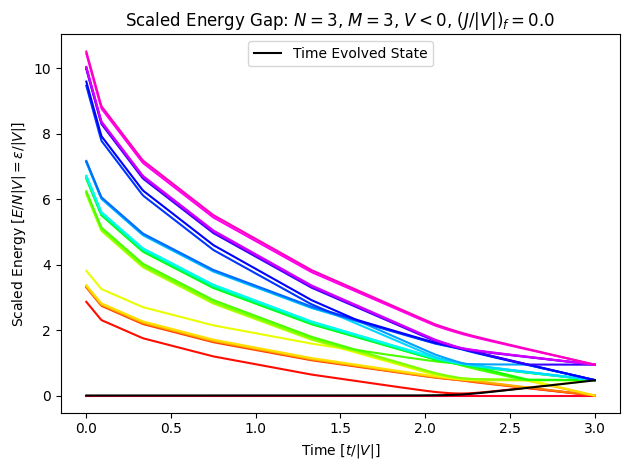

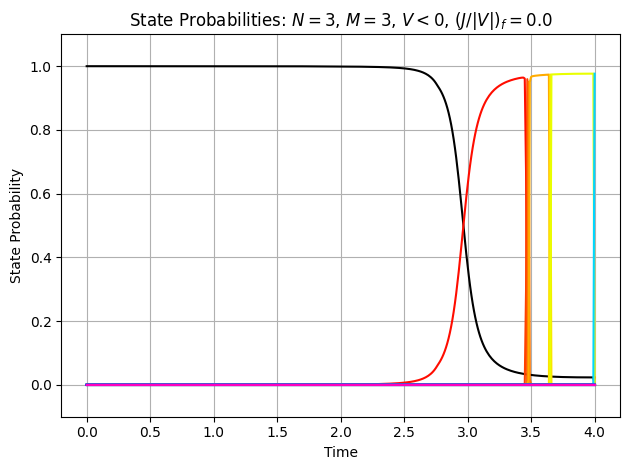

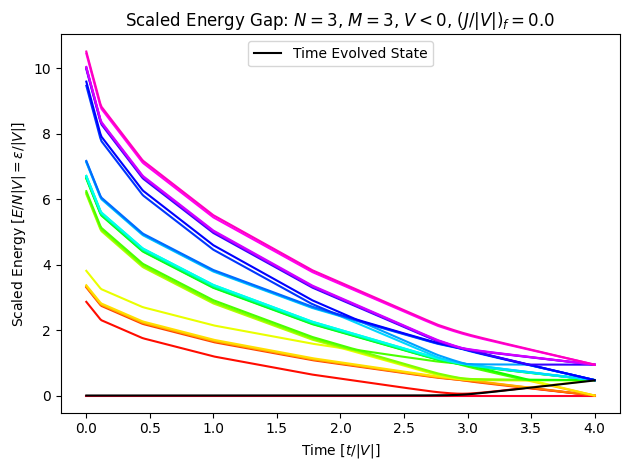

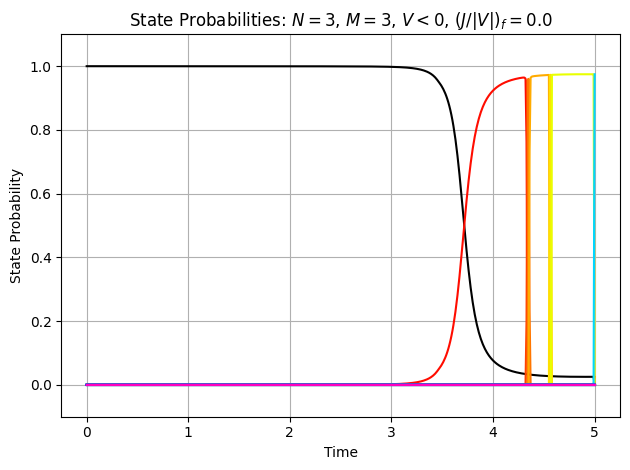

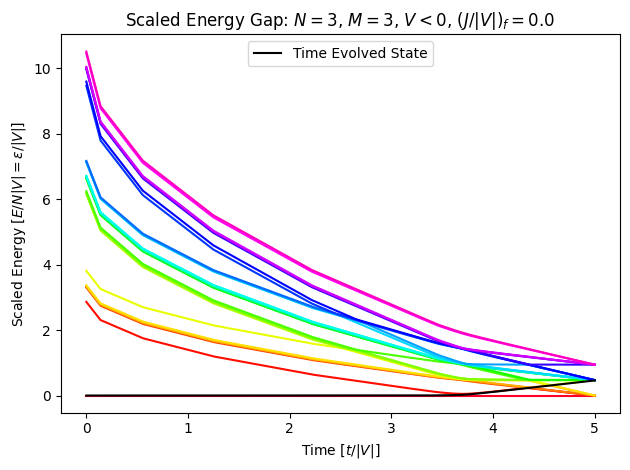

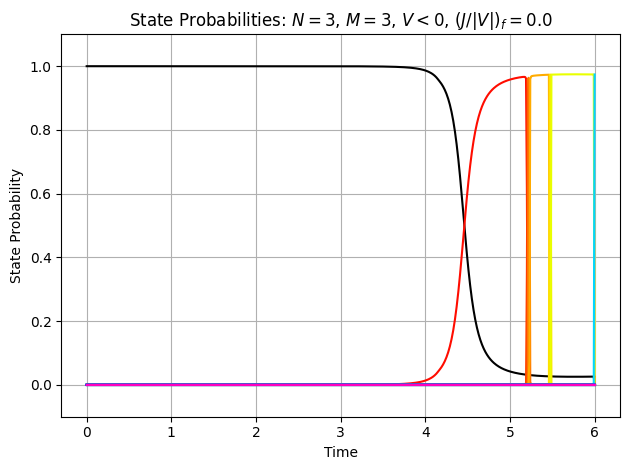

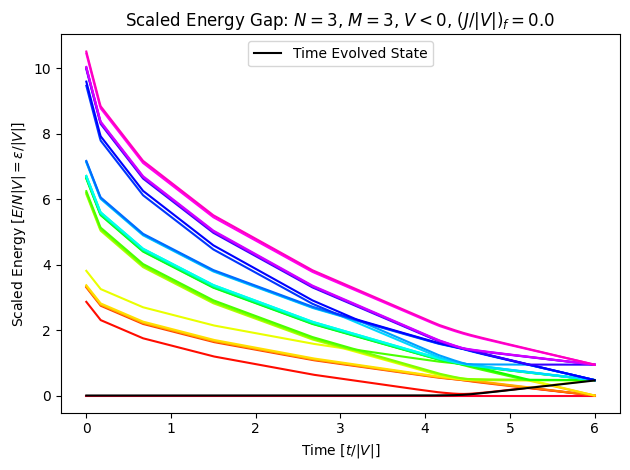

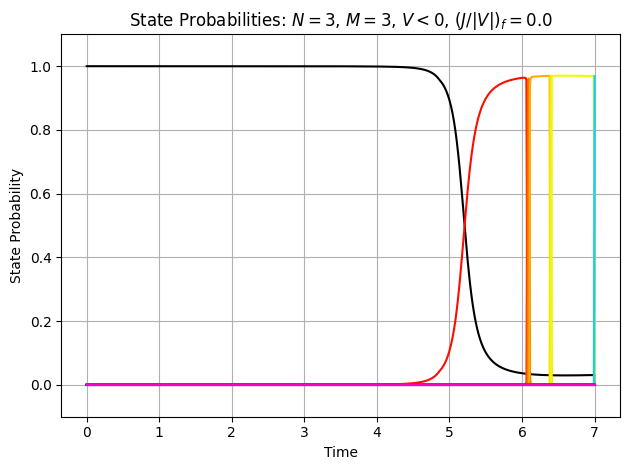

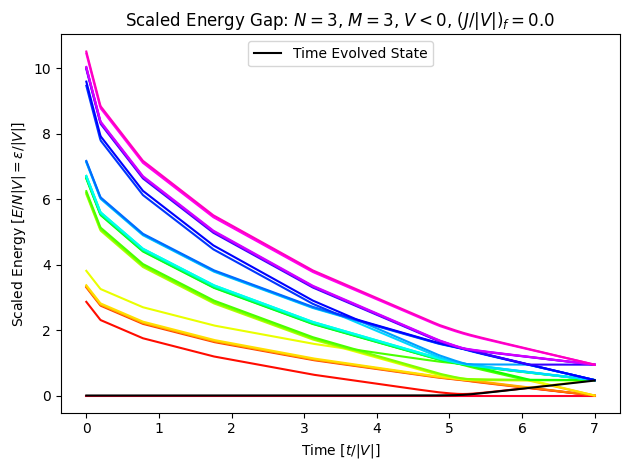

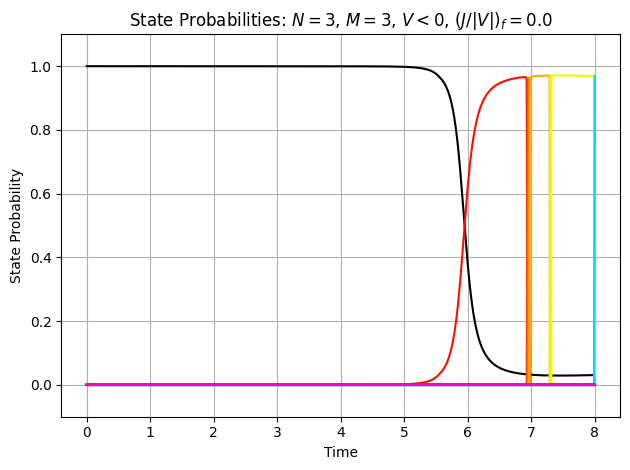

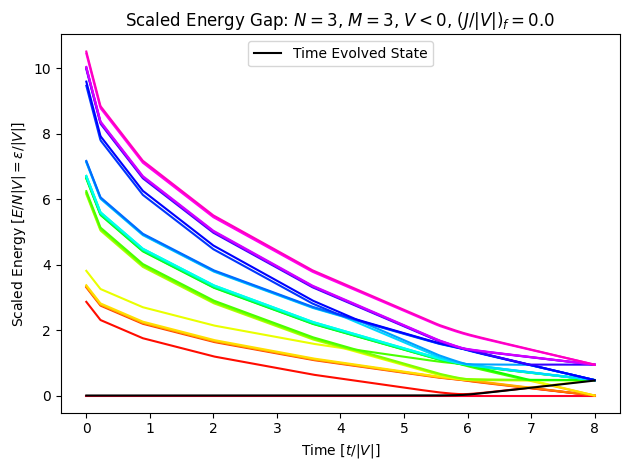

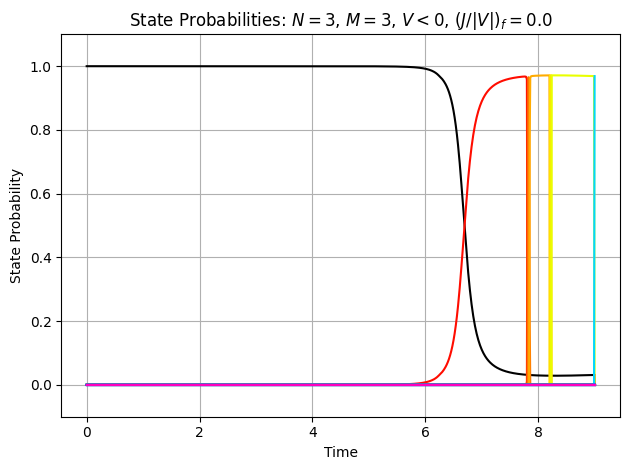

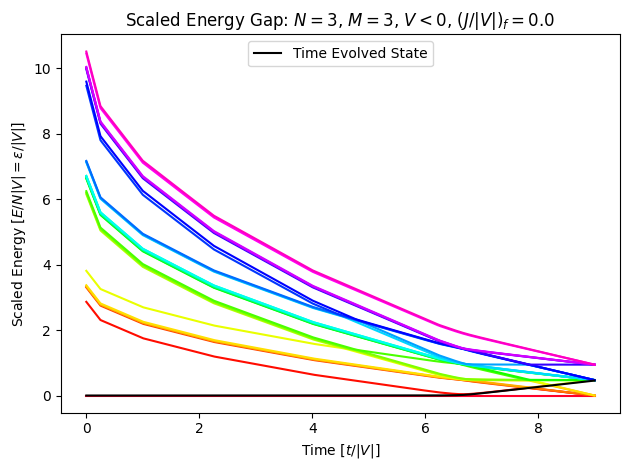

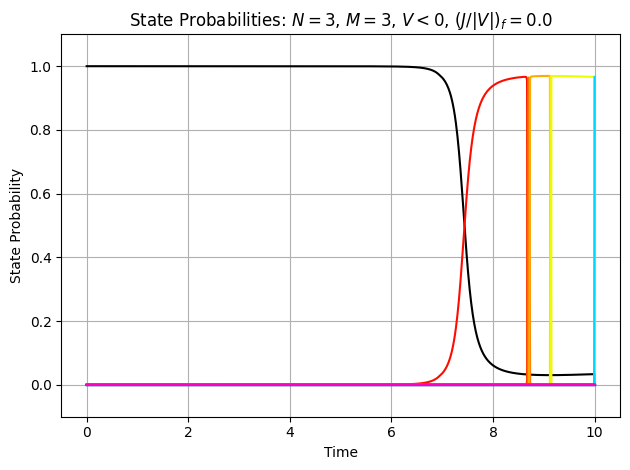

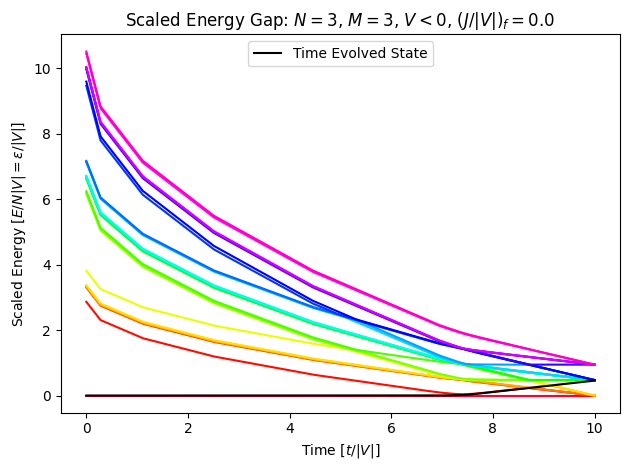

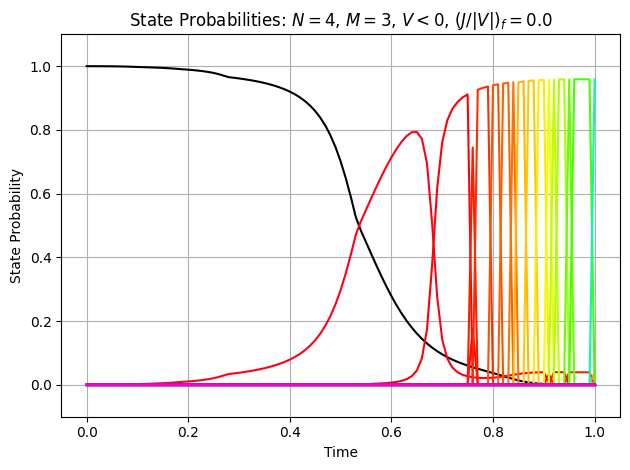

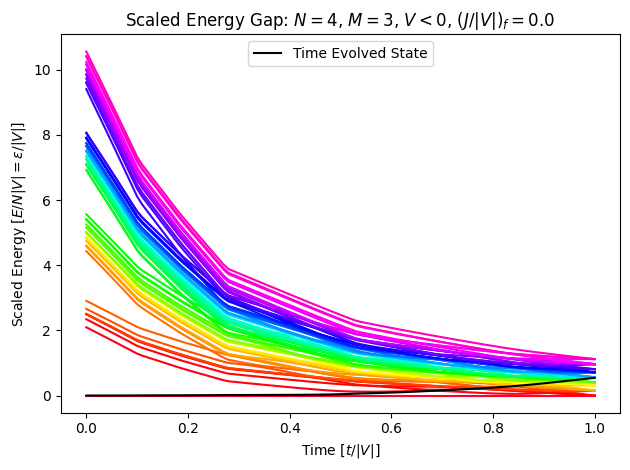

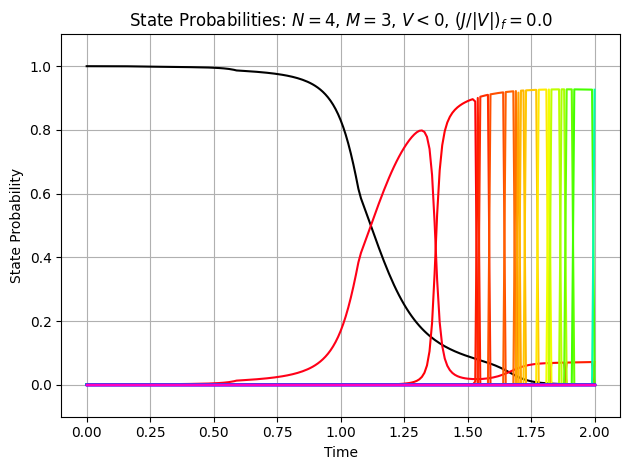

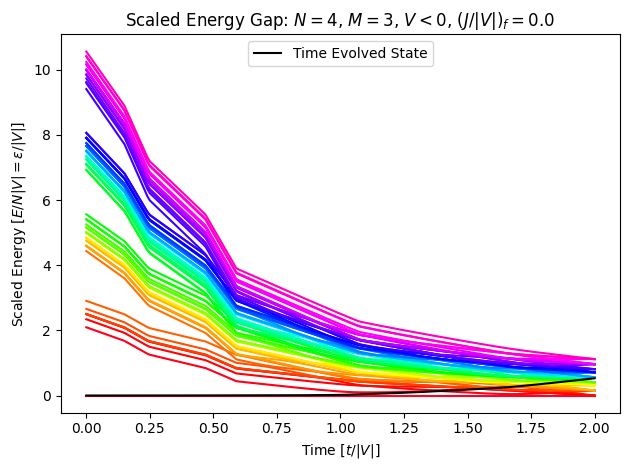

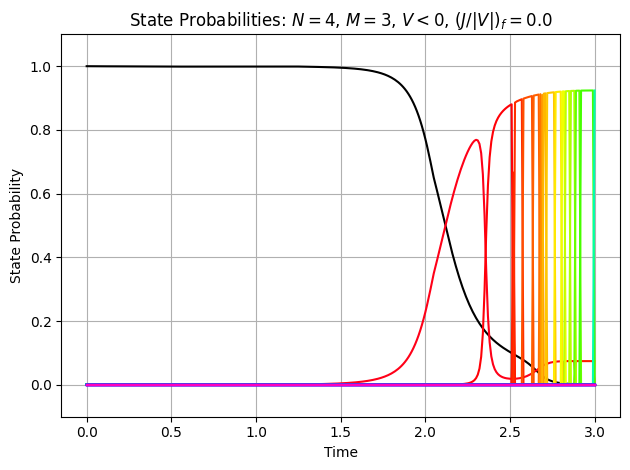

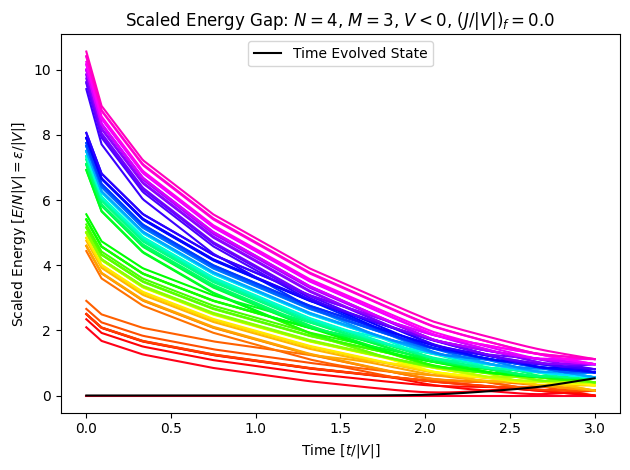

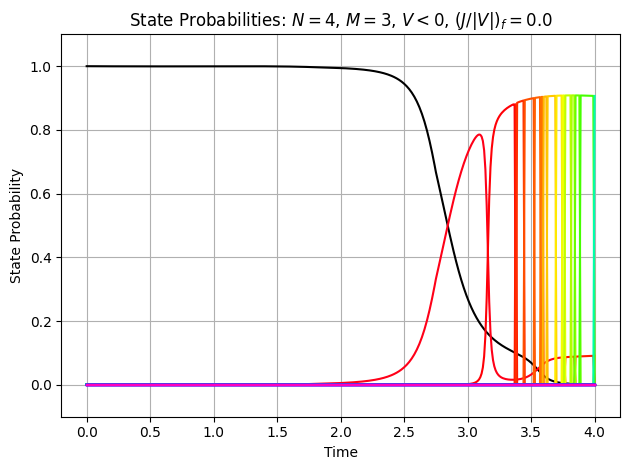

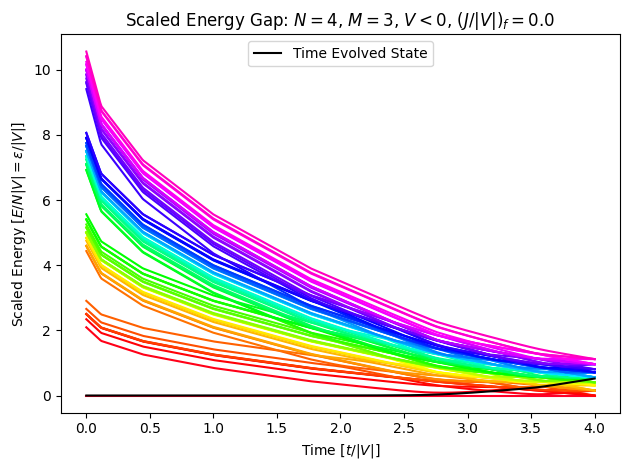

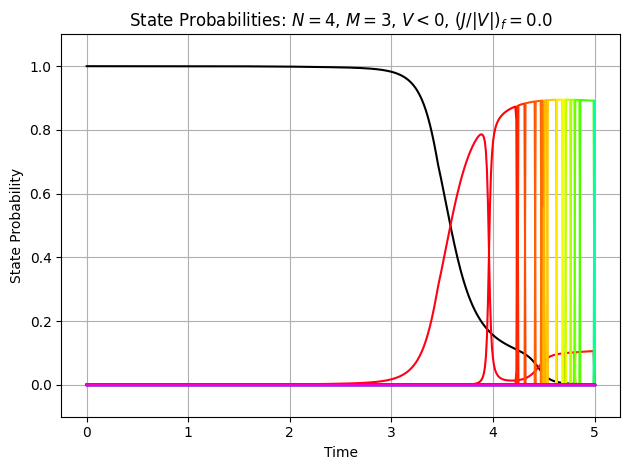

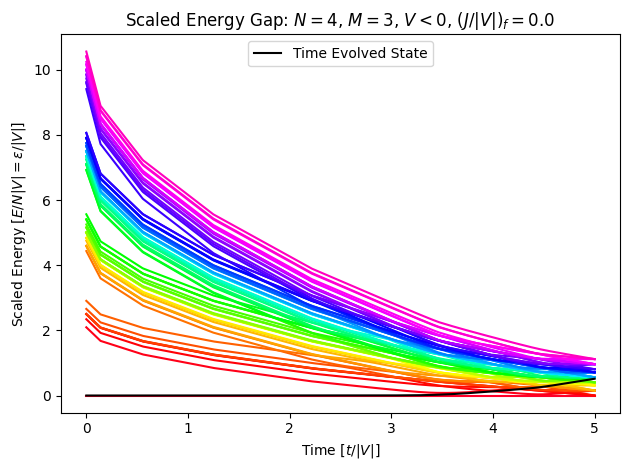

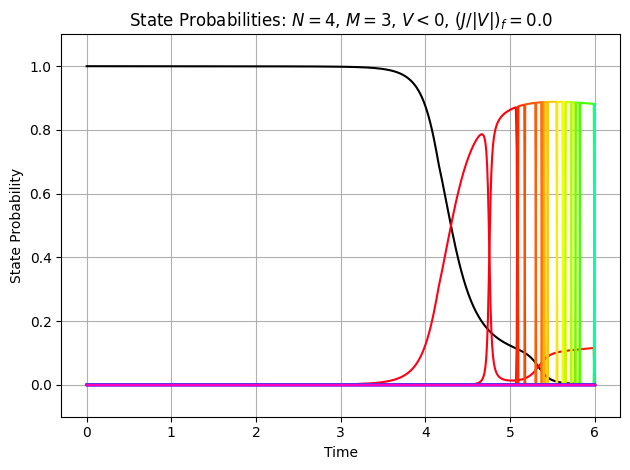

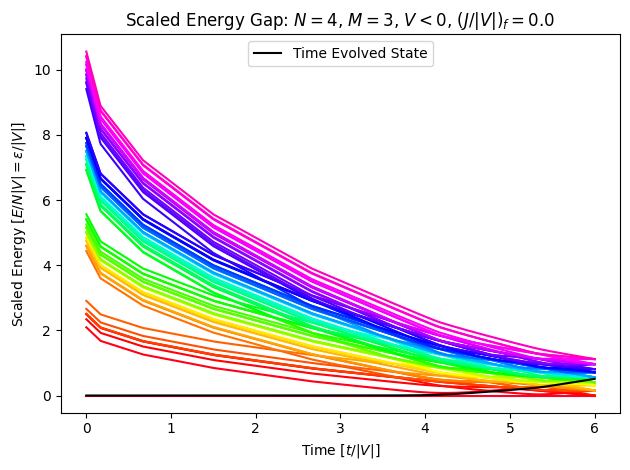

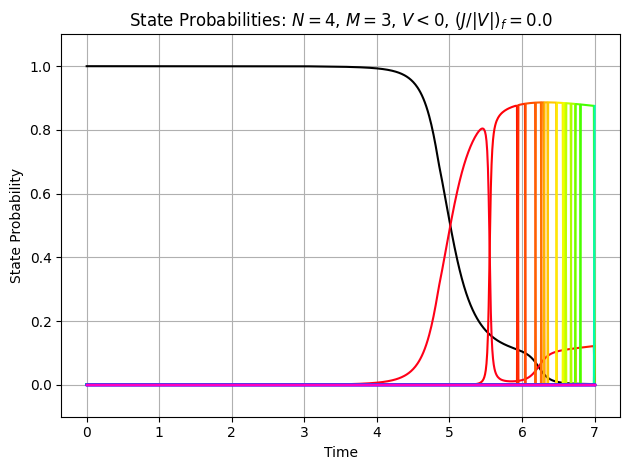

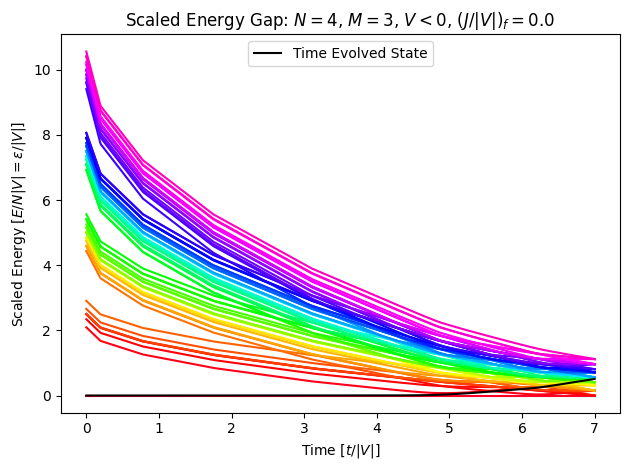

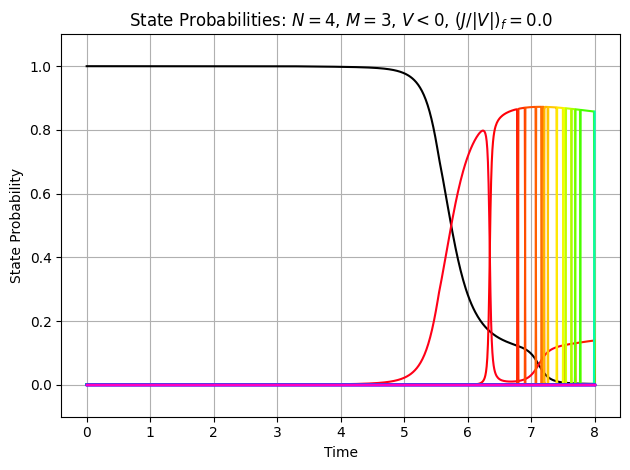

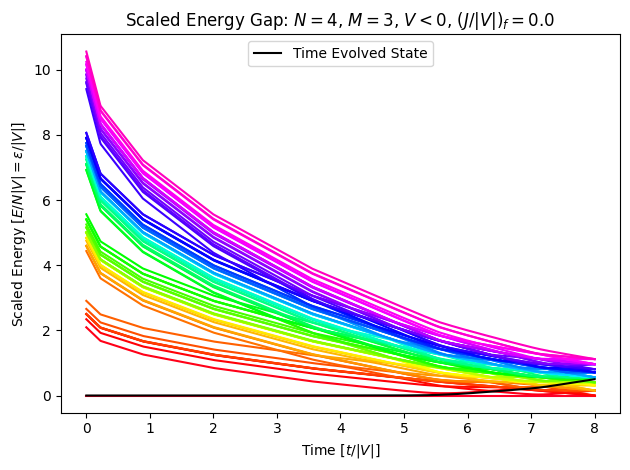

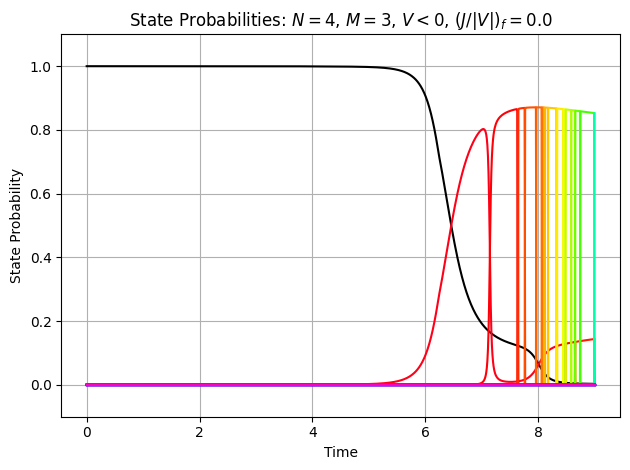

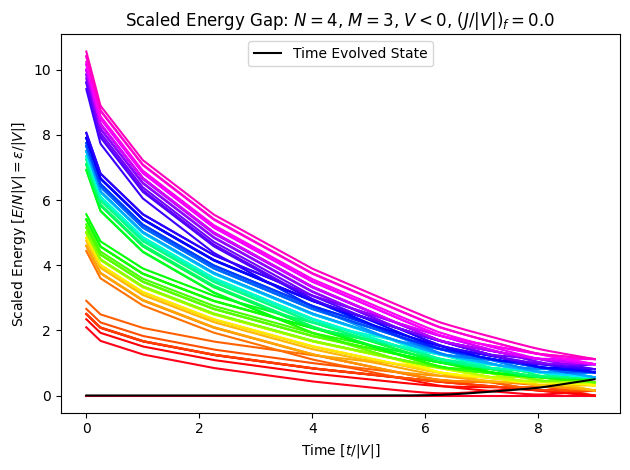

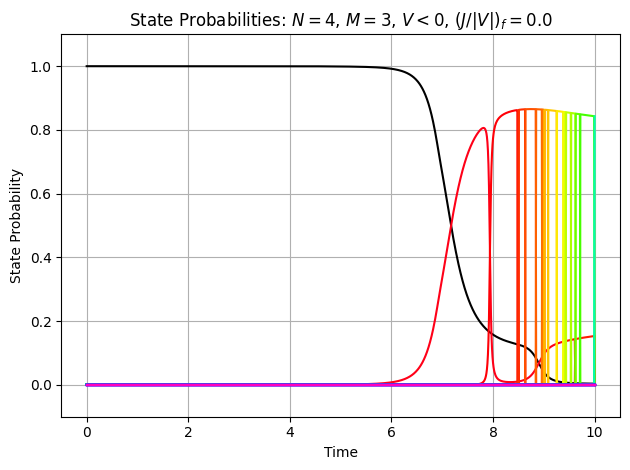

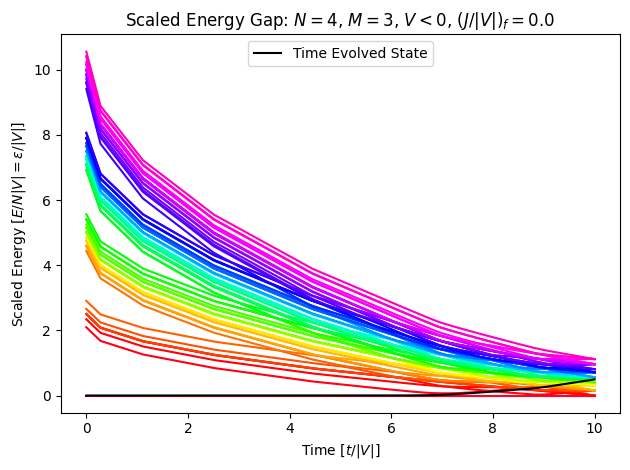

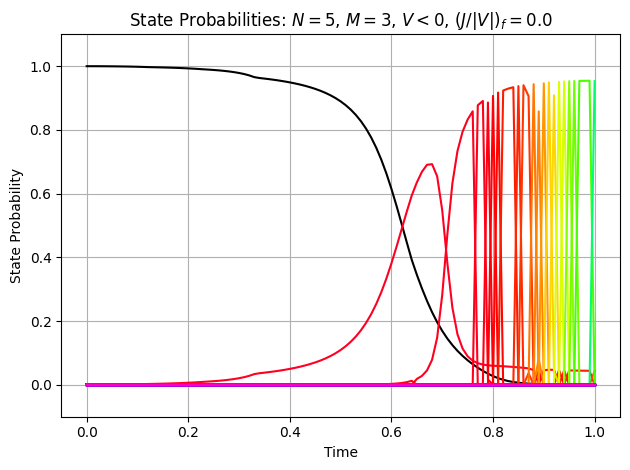

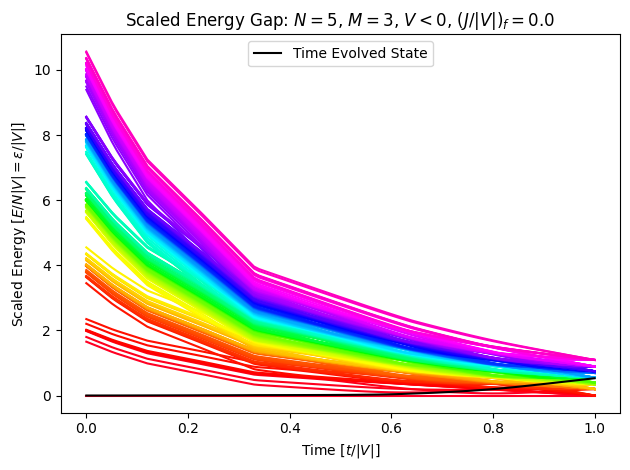

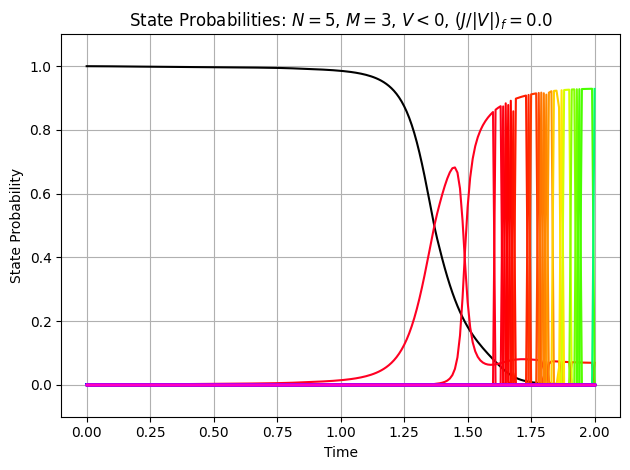

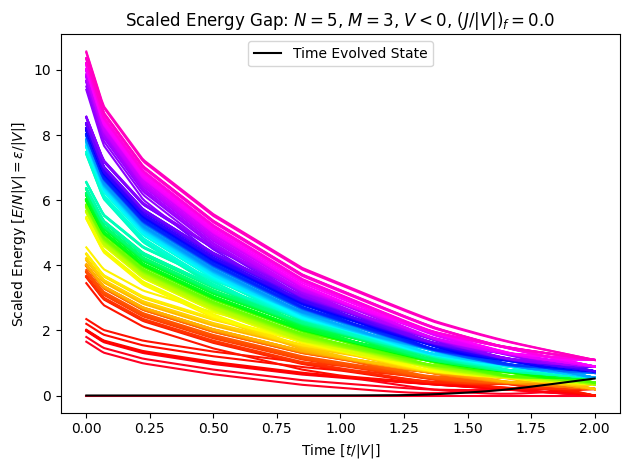

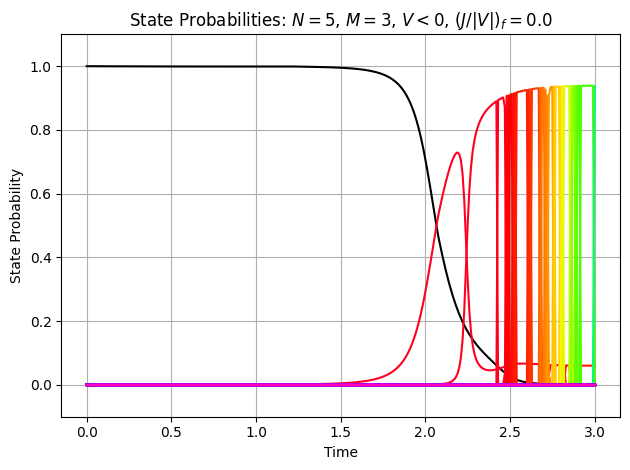

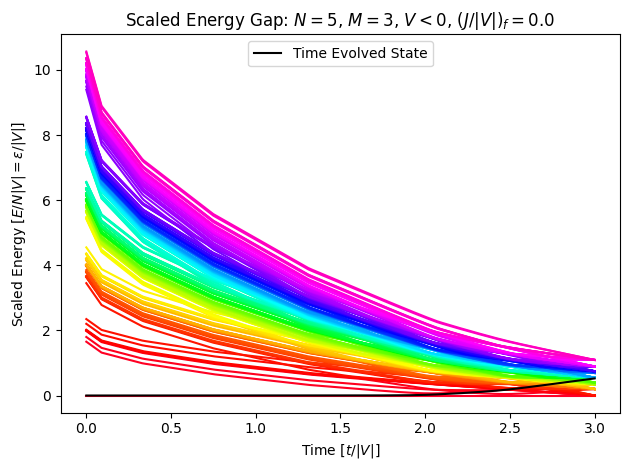

In [11]:
# M = 3, N varying plot

fig, ax = plt.subplots()

colors = {2: "red", 3: "blue", 4: "green", 5: "black"}
markers = {2: "o", 3: "s", 4: "^", 5: "D"}

M = 3
V = -1
J_V_final = 0

for N in [2,3,4,5]:
    color = colors[N]
    marker = markers[N]

    Ts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    ground_state_fidelities = []

    for T in Ts:  
        csv_filename = f"N={N}_M={M}_V={V}_JVfinal={J_V_final}_T={T}.csv"
        csv_path = os.path.join(data_folder_path, csv_filename)

        if not os.path.exists(csv_path):
            print(f"Warning: {csv_path} not found, skipping...")
            continue

        df = pd.read_csv(csv_path)
        J_V_path = np.array(df["J_V_path"])
        mu_V_path = np.array(df["mu_V_path"])
        times_dense = np.array(df["times_dense"])

        hamiltonians = [
            construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i], J_V_ratio=J_V_path[i])
            for i in range(len(times_dense))
        ]

        results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)
        ground_state_fidelities.append(results[2][-1][0])
        
        plot_time_evolution(N, M, results, times_dense, J_V_ratios=J_V_path, mu_V_ratios=mu_V_path, plot_overlaps = False, plot_sigma = False)
    
    if len(ground_state_fidelities) > 1:
        #slope, intercept = np.polyfit(Ts[:len(ground_state_fidelities)], ground_state_fidelities, deg=1)
        #fit_Ts = np.linspace(0, 10, 100)
        #fit_fidelities = np.polyval([slope, intercept], fit_Ts)

        ax.plot(Ts[:len(ground_state_fidelities)], ground_state_fidelities, marker = marker, color=color, label=f"Calculated Fidelities (N={N})")
        #ax.plot(fit_Ts, fit_fidelities, "--", color=color, label=f"$F = {slope:.3f}T + {intercept:.3f}$")

ax.set_ylim(-0.1, 1.1)
ax.set_title(f"Ground State Fidelity: $M={M}$, $V={V}$, $(J/V)_f = {J_V_final}$")
ax.set_xlabel("Total Evolution Time $T$ [$1/|V|$]")
ax.set_ylabel("Ground State Fidelity")
ax.legend(loc="center right")
ax.grid()
fig.tight_layout()

plt.show()

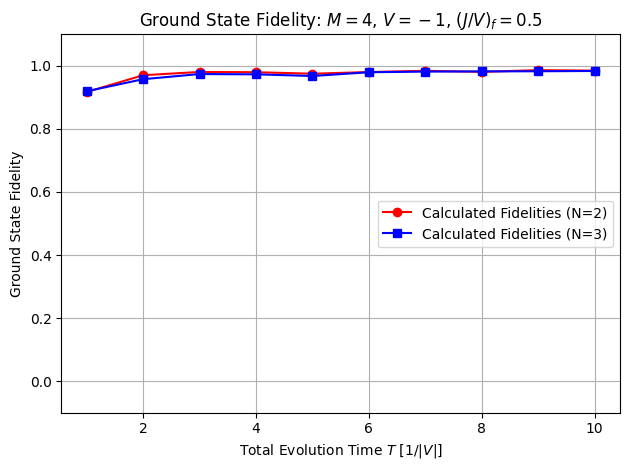

In [14]:
# M = 3, N varying plot

fig, ax = plt.subplots()

colors = {2: "red", 3: "blue", 4: "green", 5: "black"}
markers = {2: "o", 3: "s", 4: "^", 5: "D"}

M = 4
V = -1
J_V_final = 0.5

for N in [2,3,4,5]:
    color = colors[N]
    marker = markers[N]

    Ts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    ground_state_fidelities = []

    for T in Ts:  
        csv_filename = f"N={N}_M={M}_V={V}_JVfinal={J_V_final}_T={T}.csv"
        csv_path = os.path.join(data_folder_path, csv_filename)

        if not os.path.exists(csv_path):
            print(f"Warning: {csv_path} not found, skipping...")
            continue

        df = pd.read_csv(csv_path)
        J_V_path = np.array(df["J_V_path"])
        mu_V_path = np.array(df["mu_V_path"])
        times_dense = np.array(df["times_dense"])

        hamiltonians = [
            construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i], J_V_ratio=J_V_path[i])
            for i in range(len(times_dense))
        ]

        results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)
        ground_state_fidelities.append(results[2][-1][0])
        
        #plot_time_evolution(N, M, results, times_dense, J_V_ratios=J_V_path, mu_V_ratios=mu_V_path, plot_overlaps = False, plot_sigma = False)
    
    if len(ground_state_fidelities) > 1:
        #slope, intercept = np.polyfit(Ts[:len(ground_state_fidelities)], ground_state_fidelities, deg=1)
        #fit_Ts = np.linspace(0, 10, 100)
        #fit_fidelities = np.polyval([slope, intercept], fit_Ts)

        ax.plot(Ts[:len(ground_state_fidelities)], ground_state_fidelities, marker = marker, color=color, label=f"Calculated Fidelities (N={N})")
        #ax.plot(fit_Ts, fit_fidelities, "--", color=color, label=f"$F = {slope:.3f}T + {intercept:.3f}$")

ax.set_ylim(-0.1, 1.1)
ax.set_title(f"Ground State Fidelity: $M={M}$, $V={V}$, $(J/V)_f = {J_V_final}$")
ax.set_xlabel("Total Evolution Time $T$ [$1/|V|$]")
ax.set_ylabel("Ground State Fidelity")
ax.legend(loc="center right")
ax.grid()
fig.tight_layout()

plt.show()